# AI4GSD Demo
------------------------------------------
## Smartphone videos
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Importing required packages
#### 2. Defining working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI, drone flight data, or manual measurements
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data
#### 7. Applying quality control

##### *** Please contact Yunxiang Chen, yunxiang.chen@pnnl.gov for reporting errors

------------------------------------------
### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

### 1. Importing required packages

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

### 2. Defining working directory

In [3]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250521_YC_WalkSmartphoneRoadTest'                          # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername               

### 3. Extracting or copying your videos/photos to desired folder

In [4]:
#%% (1) Extracting or copying your videos/photos to desired folder.
AI4GSD.getPhotos(PhotoDir,nframe=500, overwrite=False)                     # Use once.

Video photo output folder: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250521_YC_WalkSmartphoneRoadTest
Cutting IMG_9683.MOV: to size 1280(w) * 1280(h) every 500 frames.
IMG_9683.MOV: get frame 1 from 500/2171 in 0.00 s (23.03%), file existed, skipping...
IMG_9683.MOV: get frame 2 from 1000/2171 in 0.37 s (46.06%)
IMG_9683.MOV: get frame 3 from 1500/2171 in 0.17 s (69.09%)
IMG_9683.MOV: get frame 4 from 2000/2171 in 0.20 s (92.12%)

Computation done, elapsed time 0.88 seconds.




### 4. Obtaining scales from AI, drone flight data, or manual measurements

In [5]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                     # Overwrite everything if True.
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'AI'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ConfidenceThresholdUser = 0.85                                          # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20250521_YC_WalkSmartphoneRoadTest
Estimating photo resolution via local AI model: YOLO11m.1280.20250825
Model layer: 113, model parmeter: 20.06M, submodule number: 409
IOU: 0.45, user confidence: 0.85
1/4: photo 1/4, IMG_9683_500.png, scale greencap, res 0.62 mm/px, status 200, (25.00%), 1.78 s
2/4: photo 2/4, IMG_9683_1000.png, scale greencap, res 0.59 mm/px, status 200, (50.00%), 0.76 s
3/4: photo 3/4, IMG_9683_1500.png, scale greencap, res 0.59 mm/px, status 200, (75.00%), 0.78 s
4/4: photo 4/4, IMG_9683_2000.png, scale greencap, res 0.63 mm/px, status 200, (100.00%), 0.73 s
Total time: 5.46 s, time per photo 1.37 s
-----------------------------------------------------------------



### 5. Obtaining segmentation of anthropogenic objects

In [6]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.SegmentationClassName =['people','road','steel']                        # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20250521_YC_WalkSmartphoneRoadTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 4, number of exluded photos 0
20250521_YC_WalkSmartphoneRoadTest: 1/4: IMG_9683_500.png (25.00%)
20250521_YC_WalkSmartphoneRoadTest: 2/4: IMG_9683_1000.png (50.00%)
20250521_YC_WalkSmartphoneRoadTest: 3/4: IMG_9683_1500.png (75.00%)
20250521_YC_WalkSmartphoneRoadTest: 4/4: IMG_9683_2000.png (100.00%)
Total time: 1.14 s, time per photo 0.29 s
-----------------------------------------------------------------



### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250521_YC_WalkSmartphoneRoadTest
Output folder: 20250521_YC_WalkSmartphoneRoadTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 4, number of exluded photos 0
1/4: IMG_9683_500.png, resolution 0.62 mm/px (25.00%), 0.00 s
Detected 595 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.61, 4.10, 4.47, and 5.59 cm
Detected 595 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.37, 4.99, 5.32, and 6.39 cm


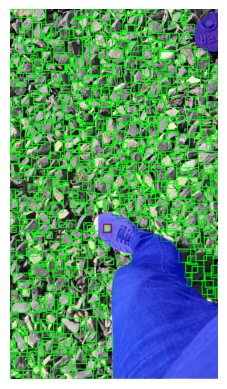

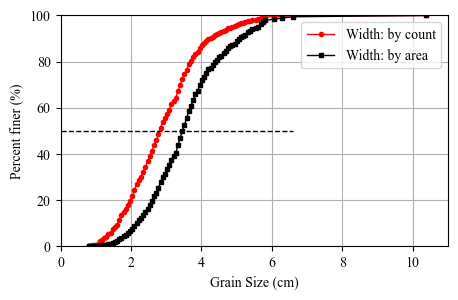

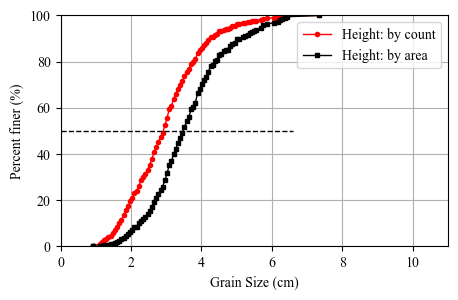

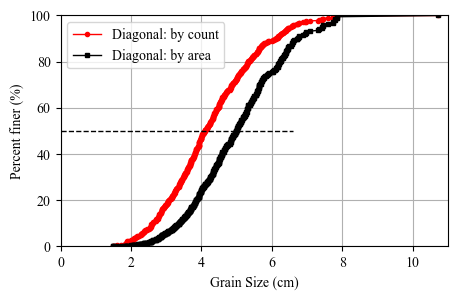

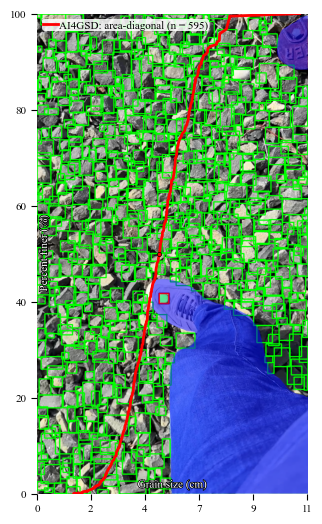

2/4: IMG_9683_1000.png, resolution 0.59 mm/px (50.00%), 3.61 s
Detected 619 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.14, 3.58, 3.83, and 4.75 cm
Detected 619 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.76, 4.32, 4.56, and 5.50 cm


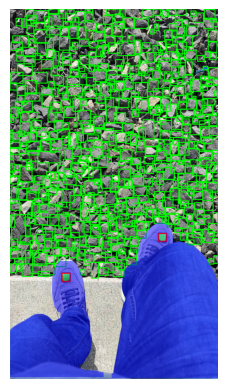

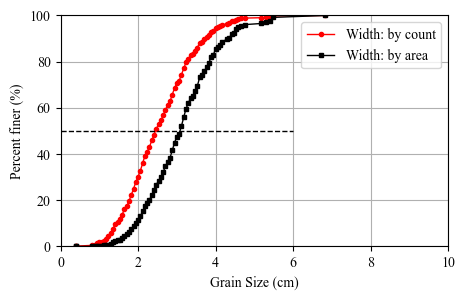

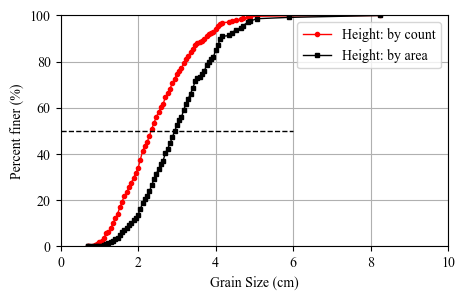

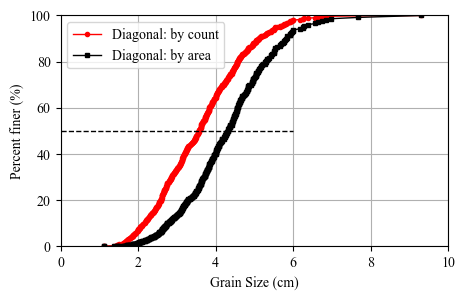

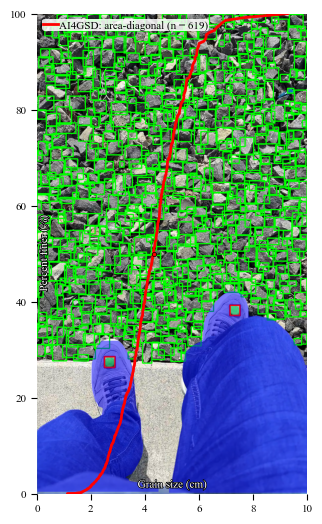

3/4: IMG_9683_1500.png, resolution 0.59 mm/px (75.00%), 3.49 s
Detected 626 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.14, 3.63, 3.96, and 4.81 cm
Detected 626 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.96, 4.40, 4.64, and 5.50 cm


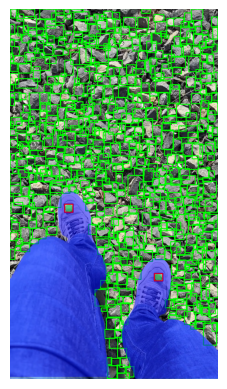

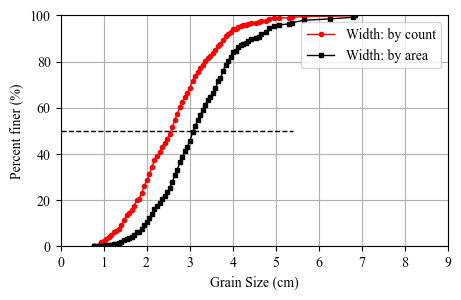

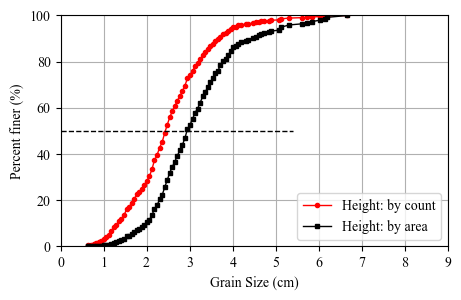

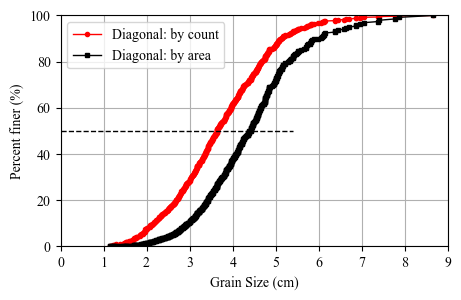

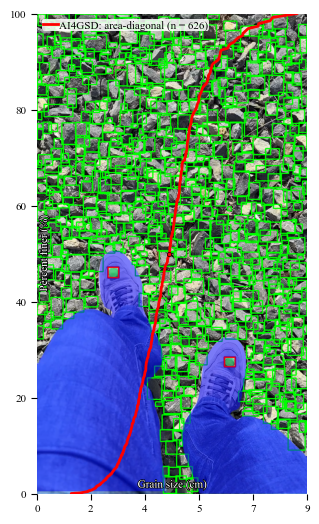

4/4: IMG_9683_2000.png, resolution 0.63 mm/px (100.00%), 3.63 s
Output folder summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250521_YC_WalkSmartphoneRoadTest/grains_predicts/20250521_YC_WalkSmartphoneRoadTest_YOLO11m.1280.20250322_35/Statistics_V3_20250521_YC_WalkSmartphoneRoadTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 1840, number of grains per photo: 460.00
Total time: 11.26 s, time per photo 2.81 s

Output all summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250521_YC_WalkSmartphoneRoadTest/Statistics_V3_20250521_YC_WalkSmartphoneRoadTest_YOLO11m.1280.20250322_35.csv
Total execution time: 11.26 s


In [7]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.YOLOSave = False
PP.SaveOverlayLabel = True
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True  
PP.MaximumGrainSize = 0.15
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)

### 7. Applying quality control

In [8]:
gsdqc, stqc = AI4GSD.qualityControl(PhotoDir)


Quality control summary for 20250521_YC_WalkSmartphoneRoadTest:
1/1: IMG_9683.MOV, time 36.2 s, area 3.0 m2, valid area 2.2 m2 (73.3%), frame 4, valid frame 3 (75.0%)
1/1: ***, grain number 1840, number per image 460.0; efficiency 0.1 m2/s, 50.8 grains/s
